# IS 597 Final Project
Jess Rogovin

## Hypothesis 1: Overall Retraction Rates
Retraction rates have increased in 2023 from previous years.

In [1]:
import pandas as pd
from hypothesis1 import get_retracted_articles, get_date_range, count_years
import matplotlib.pyplot as plt

In [2]:
year_count = count_years(get_date_range(get_retracted_articles('data/retractions.csv')))
year_count

Counter({2023: 7334,
         2022: 5517,
         2010: 5012,
         2011: 4932,
         2021: 3897,
         2020: 3071,
         2019: 2903,
         2018: 2531,
         2017: 1702,
         2016: 1681,
         2015: 1543,
         2013: 1447,
         2009: 1184,
         2012: 1153,
         2014: 1111,
         2024: 1055,
         2008: 450,
         2007: 329,
         2006: 212,
         2005: 139,
         2004: 127,
         2002: 124,
         2003: 90,
         2001: 37})

<BarContainer object of 24 artists>

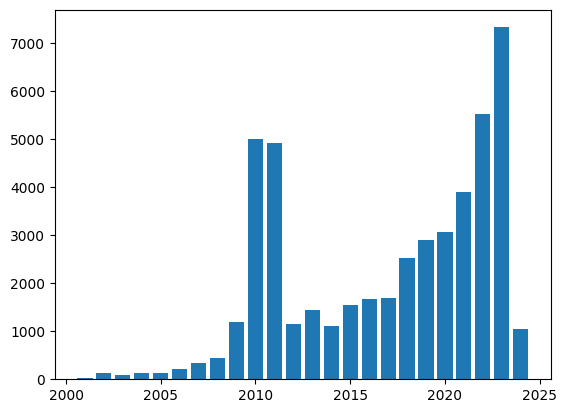

In [3]:
plt.bar(year_count.keys(), year_count.values())

Aside from a record number of retractions in 2010 due to scientific misconduct, the graph shows an overall upward trajectory of retractions since 2000. The last bar in the graph is 2024 and is incomplete, since this analysis is being completed in April 2024.

## Hypothesis 2: Reason for Retraction
The main reason for retraction is scientific misconduct and retractions due to scientific misconduct have increased in 2023 from previous years.

In [4]:
from hypothesis2 import get_retracted_articles, split_retraction_reasons, count_total_retraction_reasons, count_misconduct_by_year
import numpy as np

In [5]:
reasons = split_retraction_reasons(get_date_range(get_retracted_articles('data/retractions.csv')))
reasons = pd.DataFrame(reasons)
reasons['Reason'].replace('', np.nan, inplace=True)
reasons.dropna(subset=['Reason'], inplace=True)
reasons

,RetractionDate,RetractionNature,Reason,RetractionYear
0,3/21/2024 0:00,Retraction,+Concerns/Issues About Data,2024
0,3/21/2024 0:00,Retraction,+Concerns/Issues About Results,2024
0,3/21/2024 0:00,Retraction,+Investigation by Third Party,2024
0,3/21/2024 0:00,Retraction,+Original Data not Provided,2024
1,3/18/2024 0:00,Retraction,+Concerns/Issues About Data,2024
...,...,...,...,...
52589,1/29/2015 0:00,Retraction,+Duplication of Image,2015
52589,1/29/2015 0:00,Retraction,+Falsification/Fabrication of Image,2015
52589,1/29/2015 0:00,Retraction,+Investigation by Company/Institution,2015
52590,3/15/2012 0:00,Retraction,+Investigation by Third Party,2012


In [6]:
reason_count = count_total_retraction_reasons(reasons)
print(len(reason_count))
reason_count

107


Counter({'+Investigation by Journal/Publisher': 13656,
         '+Notice - Limited or No Information': 11021,
         '+Unreliable Results': 9042,
         '+Concerns/Issues About Data': 8242,
         '+Investigation by Third Party': 7540,
         '+Concerns/Issues about Referencing/Attributions': 6293,
         '+Date of Retraction/Other Unknown': 6107,
         '+Concerns/Issues with Peer Review': 5277,
         '+Breach of Policy by Author': 4724,
         '+Fake Peer Review': 4704,
         '+Paper Mill': 4064,
         '+Concerns/Issues About Results': 3983,
         '+Duplication of Image': 3742,
         '+Withdrawal': 3700,
         '+Randomly Generated Content': 3510,
         '+Duplication of Article': 3259,
         '+Euphemisms for Plagiarism': 2893,
         '+Investigation by Company/Institution': 2645,
         '+Plagiarism of Article': 2437,
         '+Plagiarism of Text': 2141,
         '+Misconduct by Author': 1705,
         '+Rogue Editor': 1668,
         '+Concer

Plotting this counter on a bar graph is incomprehensible because there are so many x ticks. However, we can see that scientific misconduct is not explicitly mentioned until the 21st instance in the counter. There are many reasons that also indicate misconduct such as plagiarism or "euphemisms for plagiarism". 

In [8]:
misconduct_counter = count_misconduct_by_year(split_retraction_reasons(get_date_range(get_retracted_articles('data/retractions.csv'))))
misconduct_counter

Counter({2013: 176,
         2022: 156,
         2015: 125,
         2018: 122,
         2016: 115,
         2012: 112,
         2011: 109,
         2021: 106,
         2014: 105,
         2020: 99,
         2019: 75,
         2017: 59,
         2023: 53,
         2010: 51,
         2009: 47,
         2008: 40,
         2007: 35,
         2006: 31,
         2004: 23,
         2003: 20,
         2005: 19,
         2002: 15,
         2001: 7,
         2024: 5})

<BarContainer object of 24 artists>

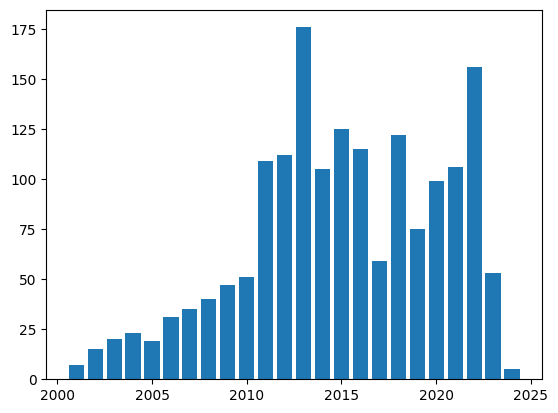

In [9]:
plt.bar(misconduct_counter.keys(), misconduct_counter.values())

Retraction due to misconduct by author has generally increased over time but was actually lower in 2023. A big factor here is probably due to there being many retraction reasons that encompass misconduct but do not explicitly say misconduct. 